In [1]:
# Python program to illustrate HoughLine
# method for line detection
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import patchesMethods as pm

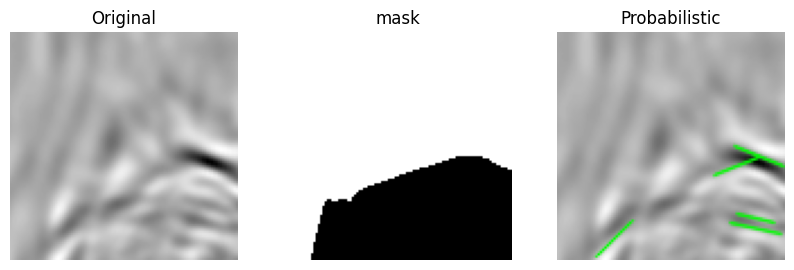

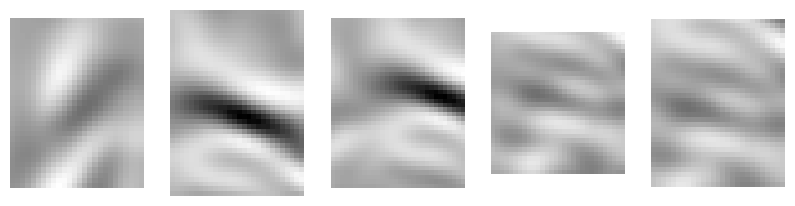

In [3]:
#sample_path="tgs_salt/1bd1c8c771.png"
sample_path="tgs_salt/0bdd44d530.png"
mask_path  ="tgs_salt/0bdd44d530Mask.png"
original = cv2.imread(sample_path)
mask     = cv2.imread(mask_path,0)
#sample_path="tgs_salt/0a1742c740.png"
patches, linesP = pm.probHough(original, original, tresh = 20, minPoints=15, maxGap=5)
pm.show3Images(original,mask, linesP)
pm.dispArrayImages(patches)

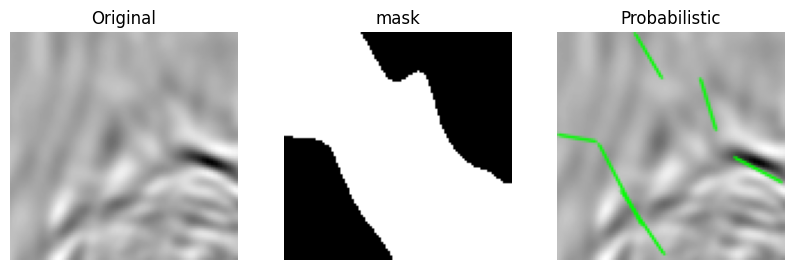

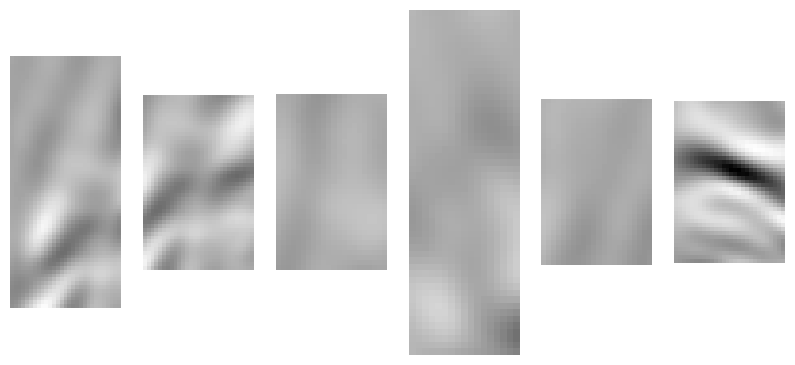

In [4]:

sample_path="tgs_salt/0bdd44d530.png"
mask_path  ="tgs_salt/0a1742c740Mask.png"

original = cv2.imread(sample_path)
mask = cv2.imread(mask_path,0)
patches, linesP = pm.probHough(mask, original, tresh = 20, minPoints=10, maxGap=10)
pm.show3Images(original,mask,linesP )
pm.dispArrayImages(patches)

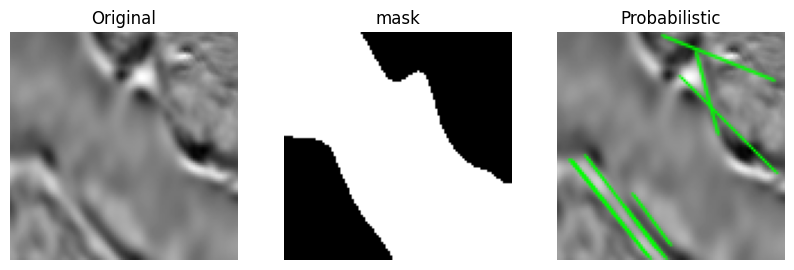

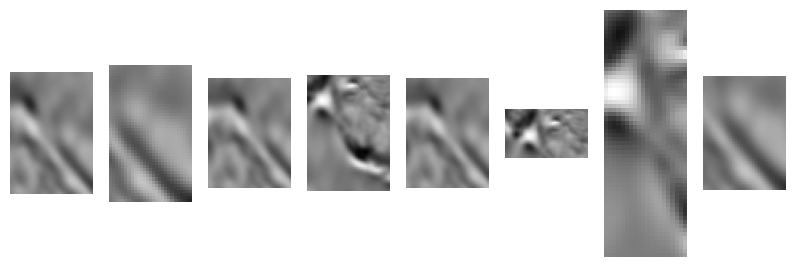

In [5]:
sample_path="tgs_salt/0a1742c740.png"
mask_path  ="tgs_salt/0a1742c740Mask.png"

original = cv2.imread(sample_path)
patches, linesP = pm.probHough(original, original, tresh = 20, minPoints=20, maxGap=10)
pm.show3Images(original,mask,linesP )
pm.dispArrayImages(patches)



In [11]:
TRAIN_CSV = r'D:\_0Luciano\_0PHD\datasets\tgs-salt\train1090.csv'
masksPath = r'D:\_0Luciano\_0PHD\datasets\tgs-salt\masks10-90'
imagesPath = r'D:\_0Luciano\_0PHD\datasets\tgs-salt\train\images'

df_train = pd.read_csv(TRAIN_CSV)
imageList = df_train.iloc[0:100,0]
  
imagesList = pm.loadImages(imagesPath, imageList)
masksList = pm.loadImages(masksPath, imageList)
pm.showImages(imagesList)
pm.showImages(masksList)

In [12]:
patchesDB = pm.buildPatchesDB(masksList, imagesList)

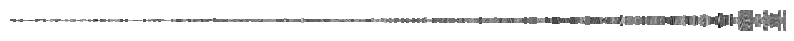

In [13]:
len(patchesDB)
    
pm.dispArrayImages(patchesDB)

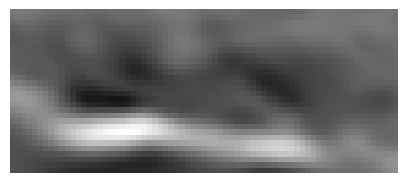

In [25]:
img = pm.searchNearestKey(patchesDB, 9)
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

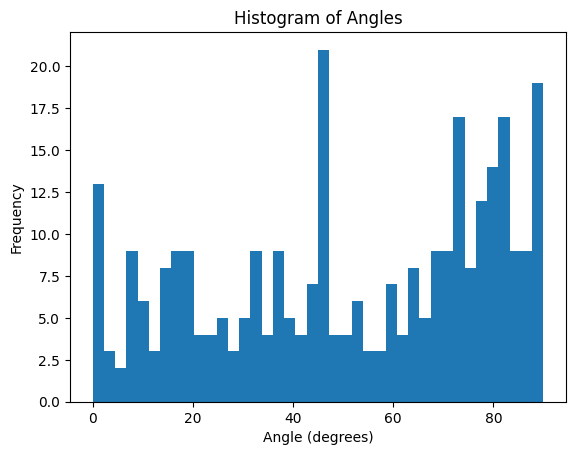

In [27]:
# make histogram of angles
angles = []
for i in range(len(patchesDB)):
    angles.append(patchesDB[i][0])
hist, bins = np.histogram(angles, bins=20)
# Plot the histogram
plt.hist(angles, bins=40)
plt.title("Histogram of Angles")
plt.xlabel("Angle (degrees)")
plt.ylabel("Frequency")
plt.show